# Sports Data Analysis 

### Objective : Company X manages the mens top professional basketball division of the American league system. The dataset contains information on all the teams that have participated in all the past tournaments. Company’s management wants to invest on proposals on managing some of the best teams in the league. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [ ]:
### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the data

In [20]:
## 1)
#Reading the CSV file
df=pd.read_csv("DS+-+Part2+-+Basketball.csv")


In [21]:
#printing the first five observations
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [22]:
#checking the dimension of the dataset
df.shape

(61, 13)

In [23]:
# Checking the datatypes of each attribute.
df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

## Data Cleaning 

In [24]:
#null values Treatment

In [25]:
df['Score'].replace('-', np.nan,inplace=True)
df['PlayedGames'].replace('-', np.nan,inplace=True)
df['WonGames'].replace('-', np.nan,inplace=True)
df['DrawnGames'].replace('-', np.nan,inplace=True)
df['LostGames'].replace('-', np.nan,inplace=True)
df['BasketScored'].replace('-', np.nan,inplace=True)
df['BasketGiven'].replace('-', np.nan,inplace=True)
df['TournamentChampion'].replace('-', np.nan,inplace=True)
df['Runner-up'].replace('-', np.nan,inplace=True)
df['TeamLaunch'].replace('-', np.nan,inplace=True)

In [26]:
#Checking for null values in the attributes
df.isnull().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

In [27]:
#Checking % of null values in the attributes
(df.isnull().sum()/len(df))*100

Team                    0.000000
Tournament              0.000000
Score                   1.639344
PlayedGames             1.639344
WonGames                1.639344
DrawnGames              1.639344
LostGames               1.639344
BasketScored            1.639344
BasketGiven             1.639344
TournamentChampion     85.245902
Runner-up              78.688525
TeamLaunch              0.000000
HighestPositionHeld     0.000000
dtype: float64

In [28]:
#Dropping the feature 'TournamentChampion','Runner-up because it consist of 75% of null values
df=df.drop(['TournamentChampion','Runner-up'],axis=1)

In [29]:
df.dropna(inplace=True)

In [30]:
#confirmation
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [31]:
#convertion of datatypes
#converting the features in numerical datatype
df["Score"]=df["Score"].astype(int)
df["PlayedGames"]=df["PlayedGames"].astype(int)
df["WonGames"]=df["WonGames"].astype(int)
df["DrawnGames"]=df["DrawnGames"].astype(int)
df["LostGames"]=df["LostGames"].astype(int)
df["BasketScored"]=df["BasketScored"].astype(int)
df["BasketGiven"]=df["BasketGiven"].astype(int)

In [32]:
#converting the features in categorical datatype
df["HighestPositionHeld"]=df["HighestPositionHeld"].astype(str)

In [33]:
df['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

In [34]:
df['TeamLaunch']=df['TeamLaunch'].str.replace("-"," ")
df['TeamLaunch']=df['TeamLaunch'].str.replace("to"," ")
df['TeamLaunch']=df['TeamLaunch'].str.replace("-"," ")
df['TeamLaunch']=df['TeamLaunch'].str.replace("_"," ")
df['TeamLaunch']=df['TeamLaunch'].str.replace("~"," ")

In [35]:
df['TeamLaunch']=df['TeamLaunch'].str.split(' ',expand=True)[0]

In [36]:
#separating the numerical variable
df_num=df.select_dtypes(include=np.number)

In [37]:
df_num.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven
0,86,4385,2762,1647,552,563,5947,3140
1,86,4262,2762,1581,573,608,5900,3114
2,80,3442,2614,1241,598,775,4534,3309
3,82,3386,2664,1187,616,861,4398,3469
4,86,3368,2762,1209,633,920,4631,3700


In [46]:
#separating the categorical variable
df_cat=df.select_dtypes(include=np.object)

In [45]:
df_cat.head()

,Team,TeamLaunch,HighestPositionHeld
0,Team 1,1929,1
1,Team 2,1929,1
2,Team 3,1929,1
3,Team 4,1931,1
4,Team 5,1929,1


## Univariate / Bivariate / Multivariate Analysis

In [47]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1


### Team with highest Tournaments played

In [48]:
#top 5
df.groupby(['Team'])[['Tournament']].max().nlargest(columns=["Tournament"],n=5)

,Tournament
Team,
Team 1,86
Team 2,86
Team 5,86
Team 4,82
Team 7,82


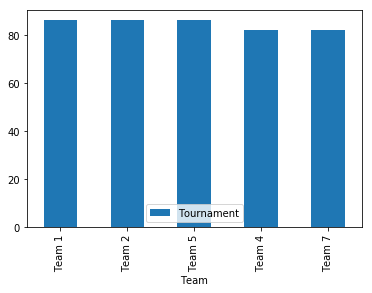

In [49]:
#top 5
df.groupby(['Team'])[['Tournament']].max().nlargest(columns=["Tournament"],n=5).plot(kind="bar")
plt.show()

#### Team 1,Team 2 and Team 5 have played highest tournaments

### Team with highest score

In [50]:
#top 5
df.groupby(['Team'])[['Score']].max().nlargest(columns=["Score"],n=5)

,Score
Team,
Team 1,4385
Team 2,4262
Team 3,3442
Team 4,3386
Team 5,3368


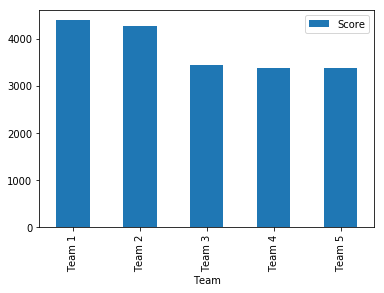

In [51]:
#top 5
df.groupby(['Team'])[['Score']].max().nlargest(columns=["Score"],n=5).plot(kind="bar")
plt.show()

#### Team 1 has highest score

### Team with highest PlayedGames

In [52]:
#top 5
df.groupby(['Team'])[['PlayedGames']].max().nlargest(columns=["PlayedGames"],n=5)

,PlayedGames
Team,
Team 1,2762
Team 2,2762
Team 5,2762
Team 4,2664
Team 7,2626


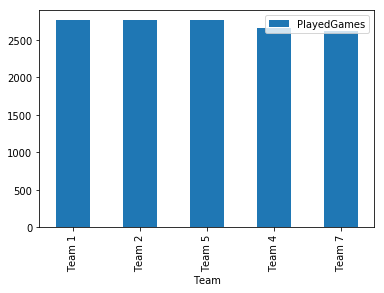

In [53]:
#top 5
df.groupby(['Team'])[['PlayedGames']].max().nlargest(columns=["PlayedGames"],n=5).plot(kind="bar")
plt.show()

#### Team 1,Team 2 and Team 5 are highest played teams

### Team with highest WonGames

In [54]:
#top 5
df.groupby(['Team'])[['WonGames']].max().nlargest(columns=["WonGames"],n=5)

,WonGames
Team,
Team 1,1647
Team 2,1581
Team 3,1241
Team 5,1209
Team 4,1187


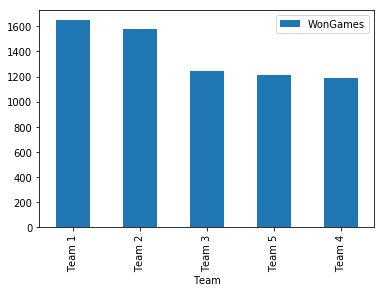

In [55]:
#top 5
df.groupby(['Team'])[['WonGames']].max().nlargest(columns=["WonGames"],n=5).plot(kind="bar")
plt.show()

#### Team 1 have won highest Games

### Team with highest BasketScored

In [56]:
#top 5
df.groupby(['Team'])[['BasketScored']].max().nlargest(columns=["BasketScored"],n=5)

,BasketScored
Team,
Team 1,5947
Team 2,5900
Team 5,4631
Team 3,4534
Team 4,4398


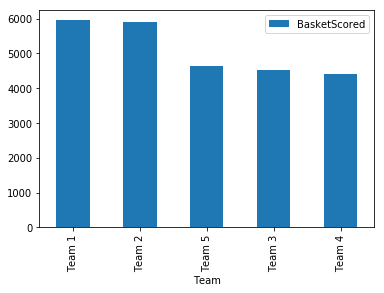

In [57]:
#top 5
df.groupby(['Team'])[['BasketScored']].max().nlargest(columns=["BasketScored"],n=5).plot(kind="bar")
plt.show()

#### Team 1 has scored highest baskets

### Team with least LostGames

In [59]:
#top 5
df.groupby(['Team'])[['LostGames']].min().nsmallest(columns=["LostGames"],n=5)

,LostGames
Team,
Team 58,15
Team 59,18
Team 56,19
Team 57,20
Team 60,21


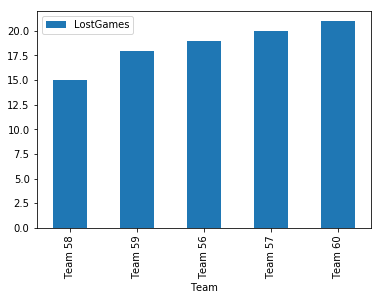

In [61]:
#top 5
df.groupby(['Team'])[['LostGames']].min().nsmallest(columns=["LostGames"],n=5).plot(kind="bar")
plt.show()

#### Team 58  has least lost games

### Team with least BasketGiven

In [62]:
#top 5
df.groupby(['Team'])[['BasketGiven']].min().nsmallest(columns=["BasketGiven"],n=5)

,BasketGiven
Team,
Team 56,55
Team 58,57
Team 60,65
Team 57,66
Team 59,85


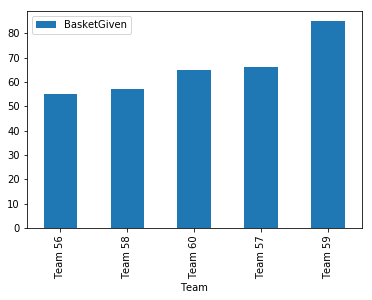

In [63]:
#top 5
df.groupby(['Team'])[['BasketGiven']].min().nsmallest(columns=["BasketGiven"],n=5).plot(kind="bar")
plt.show()

#### Team 56 has least baskets given

### Team with least DrawnGames

In [64]:
#top 5
df.groupby(['Team'])[['DrawnGames']].max().nsmallest(columns=["DrawnGames"],n=5)

,DrawnGames
Team,
Team 60,4
Team 59,5
Team 54,6
Team 58,8
Team 57,10


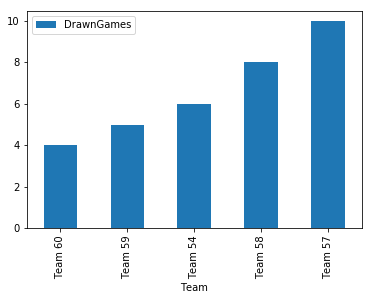

In [65]:
#top 5
df.groupby(['Team'])[['DrawnGames']].max().nsmallest(columns=["DrawnGames"],n=5).plot(kind="bar")
plt.show()

#### Team 60 has least drawn games

### Oldest teams

In [68]:
df["TeamLaunch"]=df["TeamLaunch"].astype(int)

In [69]:
#top 5
df.groupby(['Team'])[['TeamLaunch']].min().nsmallest(columns=["TeamLaunch"],n=5)

,TeamLaunch
Team,
Team 1,1929
Team 14,1929
Team 2,1929
Team 3,1929
Team 45,1929


#### Team 1 is oldest team

### Teams with HighestPositionHeld as 1

In [70]:
df[df["HighestPositionHeld"]=="1"][["Team","HighestPositionHeld"]]

,Team,HighestPositionHeld
0,Team 1,1
1,Team 2,1
2,Team 3,1
3,Team 4,1
4,Team 5,1
5,Team 6,1
7,Team 8,1
9,Team 10,1
10,Team 11,1


### creating new variables ( feature engineering )

In [71]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1


In [74]:
df["Winning_perc"]=(df["WonGames"]/df["PlayedGames"])*100

In [75]:
df["Winning_perc"]=round(df["Winning_perc"],2)

In [76]:
df["Losing_perc"]=(df["LostGames"]/df["PlayedGames"])*100

In [77]:
df["Losing_perc"]=round(df["Losing_perc"],2)

In [78]:
df["Scoring_per_match"]=(df["BasketScored"]/df["PlayedGames"])

In [79]:
df["Scoring_per_match"]=round(df["Scoring_per_match"],2)

In [80]:
df["Get_scored_per_match"]=(df["BasketGiven"]/df["PlayedGames"])

In [81]:
df["Get_scored_per_match"]=round(df["Get_scored_per_match"],2)

In [82]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Winning_perc,Losing_perc,Scoring_per_match,Get_scored_per_match
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,59.63,20.38,2.15,1.14
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,57.24,22.01,2.14,1.13
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,47.48,29.65,1.73,1.27
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,44.56,32.32,1.65,1.30
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,43.77,33.31,1.68,1.34


### Team with least Losing % of match

In [84]:
#top 5
df.groupby(['Team'])[['Losing_perc']].min().nsmallest(columns=["Losing_perc"],n=5)

,Losing_perc
Team,
Team 1,20.38
Team 2,22.01
Team 3,29.65
Team 21,32.20
Team 4,32.32


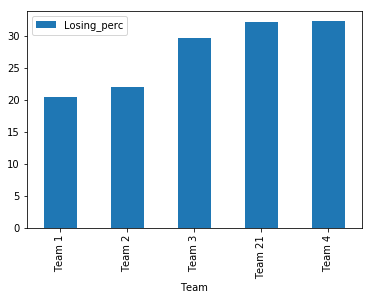

In [85]:
df.groupby(['Team'])[['Losing_perc']].max().nsmallest(columns=["Losing_perc"],n=5).plot(kind="bar")
plt.show()

#### Team 1 is least losing percent team

### Team with highest Winning % of matches

In [86]:
#top 5
df.groupby(['Team'])[['Winning_perc']].max().nlargest(columns=["Winning_perc"],n=5)

,Winning_perc
Team,
Team 1,59.63
Team 2,57.24
Team 3,47.48
Team 4,44.56
Team 5,43.77


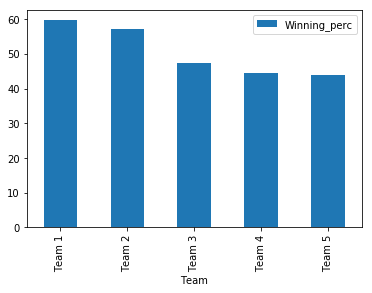

In [87]:
df.groupby(['Team'])[['Winning_perc']].max().nlargest(columns=["Winning_perc"],n=5).plot(kind="bar")
plt.show()

#### Team 1 is highest  winning percent team

### Team with highest Scoring_per_match

In [88]:
#top 10
df.groupby(['Team'])[['Scoring_per_match']].max().nlargest(columns=["Scoring_per_match"],n=5)

,Scoring_per_match
Team,
Team 1,2.15
Team 2,2.14
Team 52,2.12
Team 54,1.80
Team 45,1.75


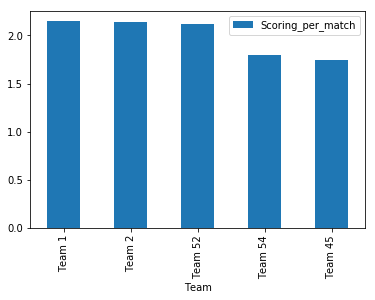

In [89]:
#top 5
df.groupby(['Team'])[['Scoring_per_match']].max().nlargest(columns=["Scoring_per_match"],n=5).plot(kind="bar")
plt.show()

#### Team 1 is highest scoring per match team

### Team with least getting scored against team

In [90]:
#top 10
df.groupby(['Team'])[['Get_scored_per_match']].min().nsmallest(columns=["Get_scored_per_match"],n=5)

,Get_scored_per_match
Team,
Team 2,1.13
Team 1,1.14
Team 21,1.22
Team 46,1.22
Team 42,1.23


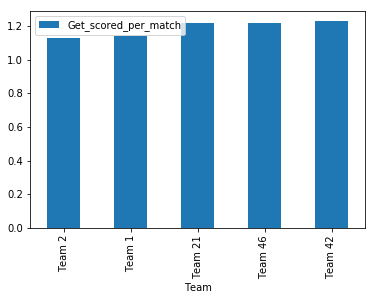

In [91]:
df.groupby(['Team'])[['Get_scored_per_match']].max().nsmallest(columns=["Get_scored_per_match"],n=5).plot(kind="bar")
plt.show()

#### Team 2 is least score getting against team 

In [92]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Winning_perc,Losing_perc,Scoring_per_match,Get_scored_per_match
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,59.63,20.38,2.15,1.14
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,57.24,22.01,2.14,1.13
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,47.48,29.65,1.73,1.27
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,44.56,32.32,1.65,1.30
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,43.77,33.31,1.68,1.34


In [93]:
df[df["HighestPositionHeld"]=="1"][["Team","Winning_perc","Losing_perc"]]

,Team,Winning_perc,Losing_perc
0,Team 1,59.63,20.38
1,Team 2,57.24,22.01
2,Team 3,47.48,29.65
3,Team 4,44.56,32.32
4,Team 5,43.77,33.31
5,Team 6,41.11,36.84
7,Team 8,37.53,37.40
9,Team 10,35.07,39.47
10,Team 11,36.80,37.58


### Teams with HighestPositionHeld as "1" has better Winning %,least Losing % of matches

In [95]:
a=df.sort_values("TeamLaunch",ascending=True)
a[["TeamLaunch","HighestPositionHeld"]]

,TeamLaunch,HighestPositionHeld
0,1929,1
51,1929,6
13,1929,2
7,1929,1
6,1929,3
44,1929,3
4,1929,1
2,1929,1
1,1929,1
53,1929,8


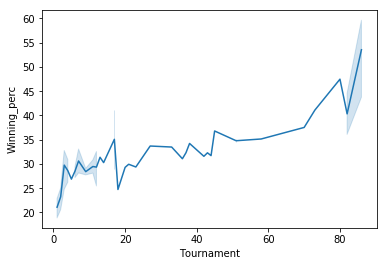

In [97]:
sns.lineplot(df["Tournament"],df["Winning_perc"])
plt.show()

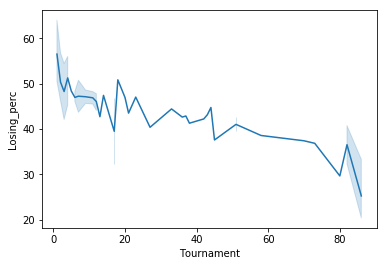

In [98]:
sns.lineplot(df["Tournament"],df["Losing_perc"])
plt.show()

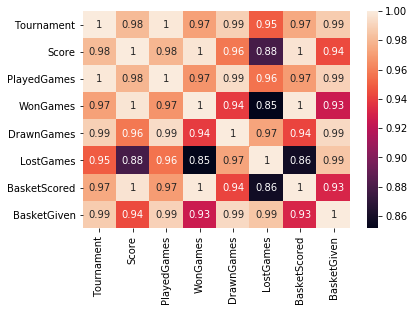

In [39]:
sns.heatmap(df.corr(),annot=True)

#### almost every variables have strong correlation with others

## INTERPRETATION 

### Best team :Team 1

### Best two teams :Team 1,Team 2

### Best five teams :Team 1,Team 2,Team 3,Team 4,Team 5

In [ ]:
## THE END  